Modeled by Tonio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0) 

df = pd.read_csv('dataset.csv')

In [3]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['int64','float64'])
df_num.describe()
df = df.drop(columns = ['dob','gender', 'job'], axis = 1)



In [4]:
#Get the correlation of the attributes
corr = df.corr()


<Axes: >

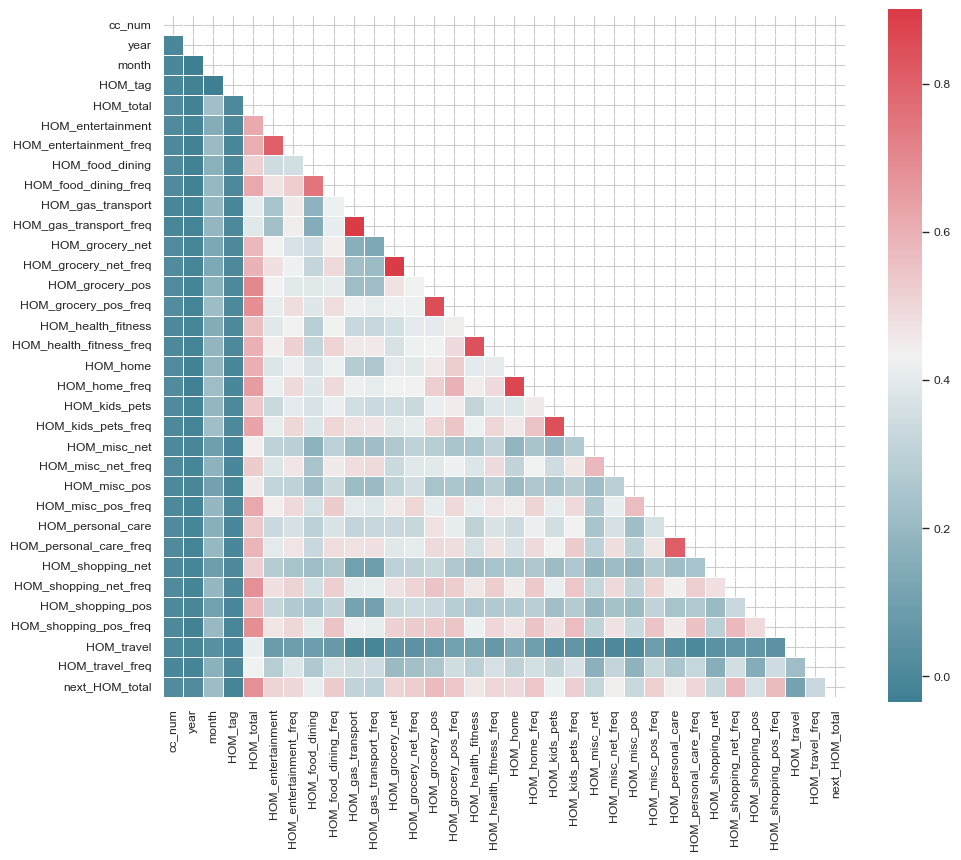

In [5]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

In [6]:
    
def cutColumns(): 
    df = df.drop(columns = ['HOM_entertainment','HOM_entertainment_freq'], axis = 1)
    df = df.drop(columns = ['HOM_food_dining','HOM_food_dining_freq'], axis = 1)
    df = df.drop(columns = ['HOM_gas_transport','HOM_gas_transport_freq'], axis = 1)
    df = df.drop(columns = ['HOM_grocery_net','HOM_grocery_net_freq'], axis = 1)
    df = df.drop(columns = ['HOM_grocery_pos','HOM_grocery_pos_freq'], axis = 1)
    df = df.drop(columns = ['HOM_health_fitness','HOM_health_fitness_freq'], axis = 1)
    df = df.drop(columns = ['HOM_home','HOM_home_freq'], axis = 1)
    df = df.drop(columns = ['HOM_kids_pets','HOM_kids_pets_freq'], axis = 1)
    df = df.drop(columns = ['HOM_misc_net','HOM_misc_net_freq'], axis = 1)
    df = df.drop(columns = ['HOM_misc_pos','HOM_misc_pos_freq'], axis = 1)
    df = df.drop(columns = ['HOM_personal_care','HOM_personal_care_freq'], axis = 1)
    df = df.drop(columns = ['HOM_shopping_net','HOM_shopping_net_freq'], axis = 1)
    df = df.drop(columns = ['HOM_shopping_pos','HOM_shopping_pos_freq'], axis = 1)
    df = df.drop(columns = ['HOM_travel','HOM_travel_freq'], axis = 1)
    df = df.drop(columns = ['dob', 'gender', 'job'])

#df.describe()


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:

x = df[['HOM_total']].values
y = df[['next_HOM_total']].values
len(x), len(y)

(42676, 42676)

In [9]:
x.shape, y.shape

((42676, 1), (42676, 1))

In [10]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn
from sklearn.linear_model import LinearRegression 

#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print (x_train.shape, x_test.shape, y_test.shape, y_train.shape)
print (x_train)
print (y_train)



(29873, 1) (12803, 1) (12803, 1) (29873, 1)
[[2960.83]
 [ 308.42]
 [ 599.01]
 ...
 [4573.57]
 [1840.14]
 [1201.54]]
[[3002.64]
 [ 335.01]
 [ 491.49]
 ...
 [5247.42]
 [1070.1 ]
 [ 593.82]]


In [12]:
#Instantiate the Scaler
scaler = StandardScaler()

#Fit to the TRAIN set
scaler.fit(y_train)
scaler.fit(x_train)

#Apply to the TRAIN set
y_train_s = scaler.transform(y_train)
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
y_test_s = scaler.transform(y_test)
x_test_s = scaler.transform(x_test)

#Convert to DataFrame for viewing
#y_train_sdf = pd.DataFrame(y_train_s, columns=y_train.columns, index=y_train.index)


Text(0.5, 1.0, 'HOM vs Next HOM')

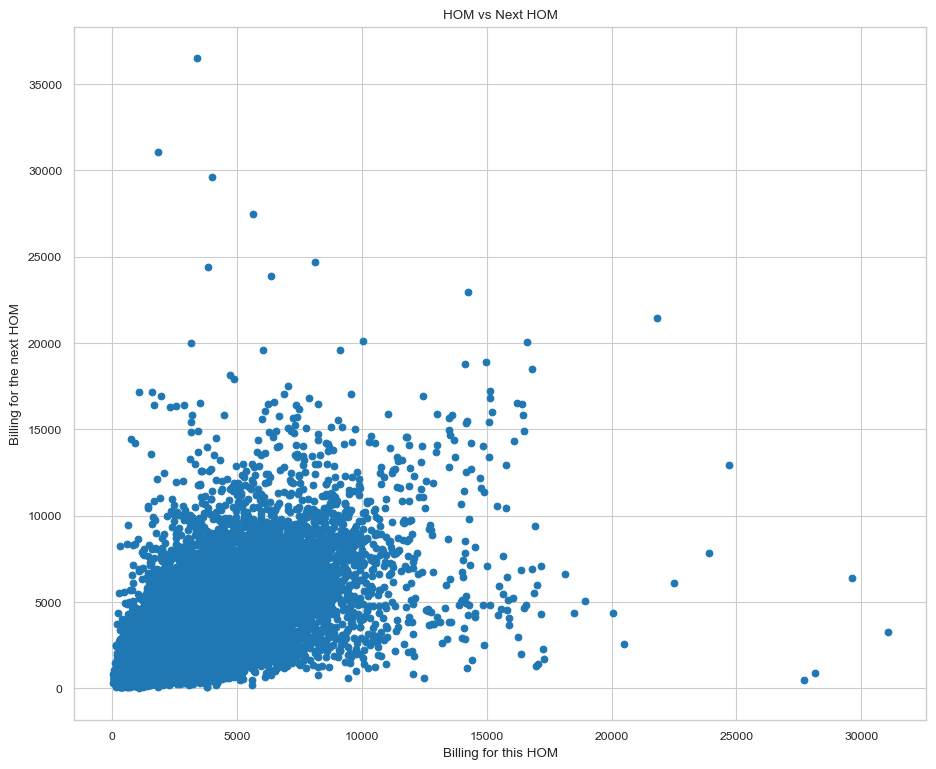

In [13]:
#Visualize the relationship
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(x_train, y_train)
plt.xlabel("Billing for this HOM")
plt.ylabel("Billing for the next HOM")
plt.title("HOM vs Next HOM")



In [14]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train,y_train)


LinearRegression()

In [15]:
#Extract Coefficient and Intercept
print(("Coefficient: %.2f") %linreg.coef_)
print(("Intercept: %.2f") %linreg.intercept_)
print(("y = %.2fx + %.2f") %(linreg.coef_, linreg.intercept_))

Coefficient: 0.71
Intercept: 894.69
y = 0.71x + 894.69


In [16]:
#Predict on the Test Set
y_pred = linreg.predict(y_test)
#View results 
y_pred[0]

array([2073.06156422])

In [17]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)

r2: 0.91
mae: 484.38
mse: 414789.78


In [18]:
#Get a table of the results
df_results = pd.DataFrame(y_test, columns=['Actual'])
df_results['Predicted'] = y_pred
print (df_results)

        Actual    Predicted
0      1666.45  2073.061564
1       688.23  1381.347569
2      2363.85  2566.203537
3      2827.51  2894.064459
4      3268.65  3206.001152
...        ...          ...
12798  4804.61  4292.101444
12799  3714.75  3521.445135
12800  1269.78  1792.570273
12801   529.32  1268.979931
12802   948.07  1565.084320

[12803 rows x 2 columns]


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

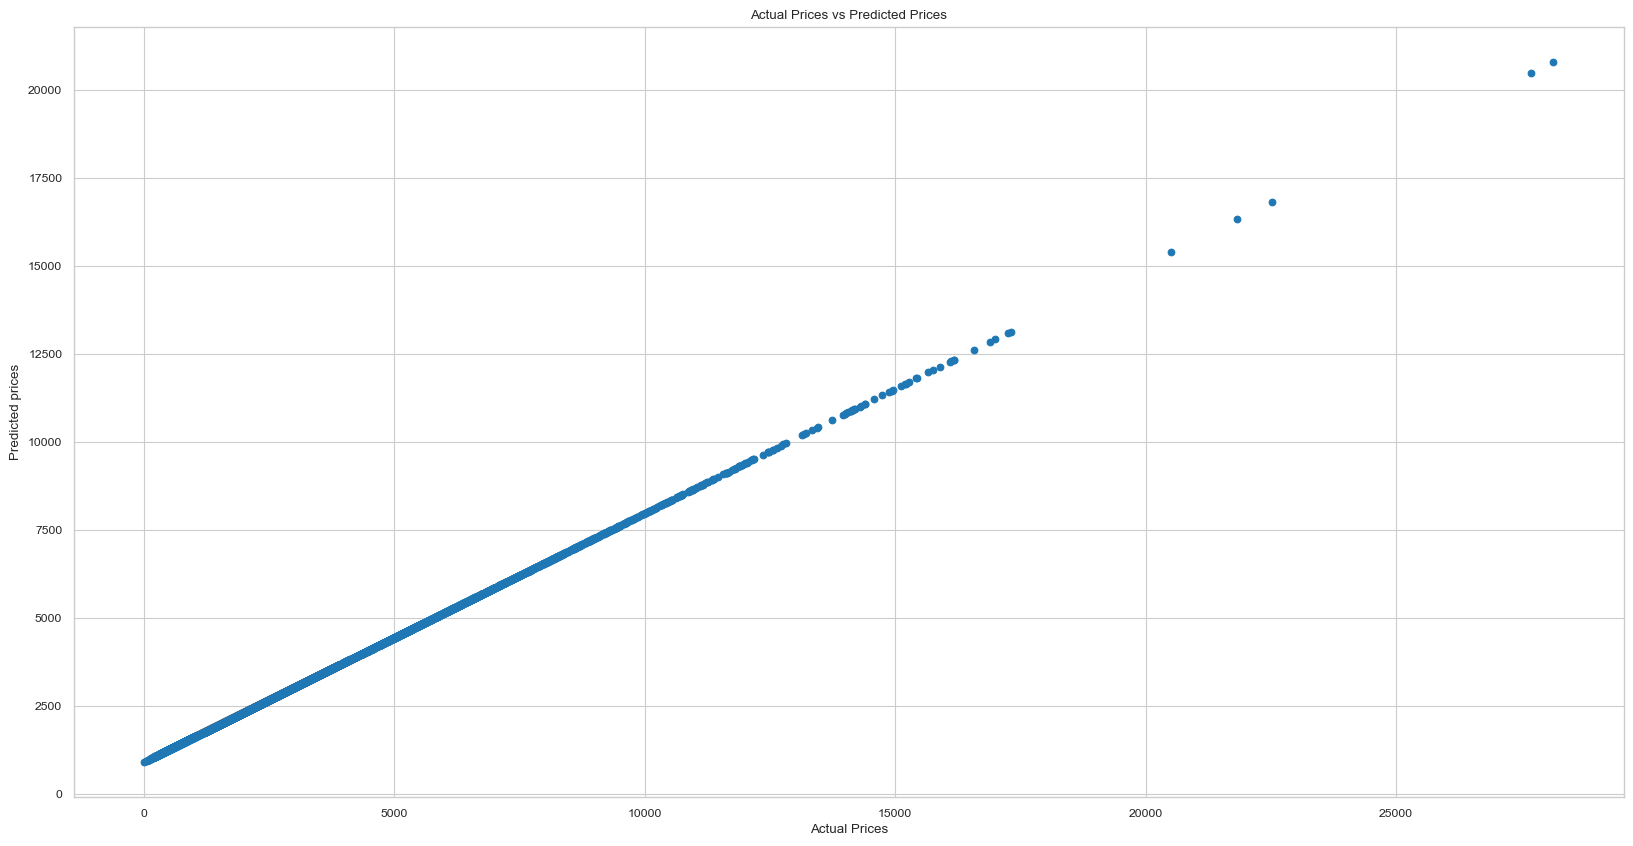

In [19]:
#Visualize the results

#Figure Size
f, ax = plt.subplots(figsize=(20, 10))

#Function for Scatter Plot
plt.scatter(y_test, y_pred)

#Labels
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")

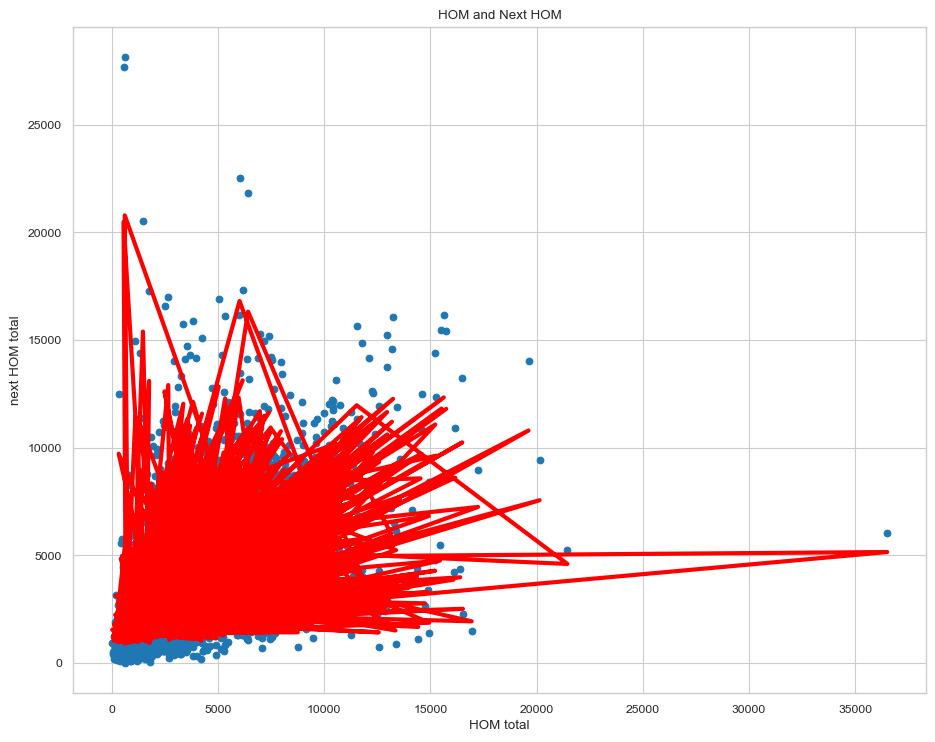

In [20]:
#Draw the regressing line based on the predicted output

#Figure Size
fig = plt.figure(figsize=(11,9))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

#Labels 
ax.set_title('HOM and Next HOM')
ax.set_xlabel('HOM total')
ax.set_ylabel('next HOM total')

#Scatter plot function
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red',linewidth=3)

plt.show()

In [39]:
df_num


,cc_num,year,month,HOM_tag,HOM_total,HOM_entertainment,HOM_entertainment_freq,HOM_food_dining,HOM_food_dining_freq,HOM_gas_transport,...,HOM_misc_pos_freq,HOM_personal_care,HOM_personal_care_freq,HOM_shopping_net,HOM_shopping_net_freq,HOM_shopping_pos,HOM_shopping_pos_freq,HOM_travel,HOM_travel_freq,next_HOM_total
0,2703186189652095,2019,1,1,2904.31,218.73,4,90.69,3,67.67,...,1,215.16,5,557.81,5,140.54,7,12.16,2,5513.39
1,2703186189652095,2019,1,2,5513.39,476.50,7,152.08,2,0.00,...,3,100.88,4,1941.28,6,620.88,5,22.97,3,3696.99
2,2703186189652095,2019,2,1,3696.99,244.19,2,22.93,1,0.00,...,6,22.00,1,1422.89,2,176.81,7,0.00,0,2847.65
3,2703186189652095,2019,2,2,2847.65,85.84,2,317.45,6,0.00,...,3,180.44,2,216.05,3,758.24,4,0.00,0,4785.08
4,2703186189652095,2019,3,1,4785.08,245.70,3,51.88,2,152.95,...,4,327.45,6,584.38,1,297.77,9,0.00,0,4127.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42671,5410056176712193,2020,10,1,621.74,33.59,1,9.75,1,63.88,...,0,0.00,0,34.74,5,10.46,2,0.00,0,1876.81
42672,5410056176712193,2020,10,2,1876.81,0.00,0,165.12,3,76.00,...,0,2.64,1,0.00,0,1515.34,3,0.00,0,626.29
42673,5410056176712193,2020,11,1,626.29,150.61,2,21.22,2,0.00,...,0,8.72,1,0.00,0,0.00,0,0.00,0,648.02
42674,5410056176712193,2020,11,2,648.02,61.56,2,28.61,2,0.00,...,1,3.87,2,110.68,1,7.48,1,9.42,1,1606.97


In [43]:
df.describe()

,cc_num,year,month,HOM_tag,HOM_total,HOM_entertainment,HOM_entertainment_freq,HOM_food_dining,HOM_food_dining_freq,HOM_gas_transport,...,HOM_misc_pos_freq,HOM_personal_care,HOM_personal_care_freq,HOM_shopping_net,HOM_shopping_net_freq,HOM_shopping_pos,HOM_shopping_pos_freq,HOM_travel,HOM_travel_freq,next_HOM_total
count,4.267600e+04,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,...,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000,42676.000000
mean,4.090328e+17,2019.489362,6.382979,1.489362,2809.572456,190.613635,3.017317,149.941091,2.945965,268.919216,...,2.566009,140.624773,2.923610,223.285213,3.092230,275.572899,3.726638,144.849358,1.304621,2879.603475
std,1.293285e+18,0.499893,3.393106,0.499893,2152.725961,213.399802,2.533202,154.668309,2.546023,240.319483,...,2.357787,150.550584,2.564838,443.842408,2.780091,521.247543,3.181651,722.193572,1.369925,2226.584890
min,6.041621e+10,2019.000000,1.000000,1.000000,10.560000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.560000
25%,1.800391e+14,2019.000000,3.000000,1.000000,1275.165000,34.210000,1.000000,30.207500,1.000000,81.880000,...,1.000000,24.317500,1.000000,7.370000,1.000000,10.070000,1.000000,0.000000,0.000000,1300.782500
50%,3.521616e+15,2019.000000,6.000000,1.000000,2300.835000,128.605000,2.000000,108.775000,2.000000,209.265000,...,2.000000,94.570000,2.000000,40.445000,2.000000,50.150000,3.000000,5.905000,1.000000,2350.665000
75%,4.651725e+15,2020.000000,9.000000,2.000000,3718.997500,275.152500,4.000000,222.985000,4.000000,386.385000,...,4.000000,209.417500,4.000000,263.130000,4.000000,319.650000,5.000000,14.300000,2.000000,3796.765000
max,4.992346e+18,2020.000000,12.000000,2.000000,36508.160000,2302.410000,27.000000,1516.510000,26.000000,2199.570000,...,20.000000,1715.860000,21.000000,9586.370000,26.000000,10538.540000,34.000000,28957.460000,13.000000,36508.160000


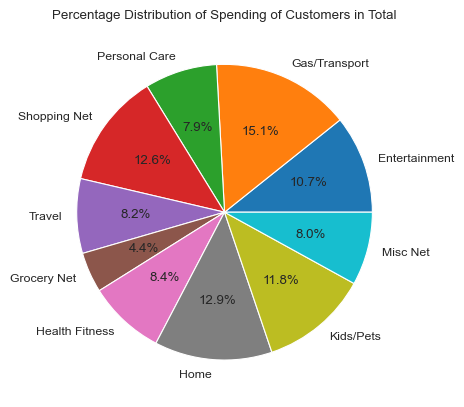

In [53]:
total_mean = df['HOM_total'].mean()
mean_enter = df['HOM_entertainment'].mean()
mean_gat = df['HOM_gas_transport'].mean()
mean_pc = df['HOM_personal_care'].mean()
mean_shop = df['HOM_shopping_net'].mean()
mean_travel = df['HOM_travel'].mean()
mean_grocery = df['HOM_grocery_net'].mean()
mean_fitness = df['HOM_health_fitness'].mean()
mean_home = df['HOM_home'].mean()
mean_kidspets = df['HOM_kids_pets'].mean()
mean_misc = df['HOM_misc_net'].mean()


percent_enter = (mean_enter / total_mean) * 100
percent_gat = (mean_gat / total_mean) * 100
percent_pc = (mean_pc / total_mean) * 100
percent_shop = (mean_shop / total_mean) * 100
percent_travel = (mean_travel / total_mean) * 100
percent_grocery = (mean_grocery / total_mean) * 100
percent_fitness = (mean_fitness / total_mean) * 100
percent_home = (mean_home / total_mean) * 100
percent_kidspets = (mean_kidspets / total_mean) * 100
percent_misc = (mean_misc / total_mean) * 100



# Create a pie chart
labels = ['Entertainment', 'Gas/Transport', 'Personal Care', 'Shopping Net', 'Travel',
          'Grocery Net', 'Health Fitness', 'Home', 'Kids/Pets', 'Misc Net']
sizes = [percent_enter, percent_gat, percent_pc, percent_shop, percent_travel,
         percent_grocery, percent_fitness, percent_home, percent_kidspets, percent_misc]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title("Percentage Distribution of Spending of Customers in Total")

# Display the chart
plt.show()
